In [76]:
# Compare original trips versus linked
import pandas as pd
% matplotlib inline

In [139]:
old = pd.read_csv(r'5_PSRC2015_GPS_Trip_v1.0.csv')
new = pd.read_csv(r'gps2015_linked.csv')    # total results

old_name = 'Old'
new_name = 'New'

# analyze distribution of merged trip modes
bad_trips = pd.read_csv('bad_trips.csv')
linked_trips = pd.read_csv('linked_trips.csv')

In [87]:
# Read in labels
purpose_labels = pd.read_csv('purpose_labels.txt', sep='\t')
mode_labels = pd.read_csv('mode_labels.txt', sep='\t')

In [95]:
def add_label(df,label_df,field):
    df=pd.merge(df,label_df,left_on=field, right_on='value')
    df.drop(field,axis=1, inplace=True)
    df[field] = df['label']
    df.drop('value',axis=1,inplace=True)
    df.drop('label',axis=1,inplace=True)
    return df

In [146]:
old = add_label(old,purpose_labels,'d_purpose')
old = add_label(old,mode_labels,'mode')
new = add_label(new,purpose_labels,'d_purpose')
new = add_label(new,mode_labels,'mode')

In [140]:
linked_trips = add_label(linked_trips,purpose_labels,'d_purpose')
linked_trips = add_label(linked_trips,mode_labels,'mode')
bad_trips = add_label(bad_trips,purpose_labels,'d_purpose')
bad_trips = add_label(bad_trips,mode_labels,'mode')

In [147]:
old['d_purpose']

0                                         Primary work
1                                         Primary work
2                                         Primary work
3                                         Primary work
4                                         Primary work
5                                         Primary work
6                                         Primary work
7                                         Primary work
8                                         Primary work
9                                         Primary work
10                                        Primary work
11                                        Primary work
12                                        Primary work
13                                        Primary work
14                                        Primary work
15                                        Primary work
16                                        Primary work
17                                        Primary work
18        

# Records by Mode

                            Old   New  Difference
mode                                             
Airplane                     24    24           0
Bike                        186   182          -4
Bikeshare bike                1     2           1
Carshare                     13    13           0
HH vehicle 1               4235  4188         -47
HH vehicle 2               1640  1618         -22
HH vehicle 3                 97    94          -3
HH vehicle 4                 36    36           0
Intercity bus                 1     1           0
More than one mode chosen   198    68        -130
Other HH vehicle             90    86          -4
Other auto                  277   269          -8
Other bus                     8     9           1
Other mode                   30    27          -3
Public bus                  446   368         -78
Rental bike                   1     1           0
Rental car                  207   201          -6
Rideshare                    25    23          -2


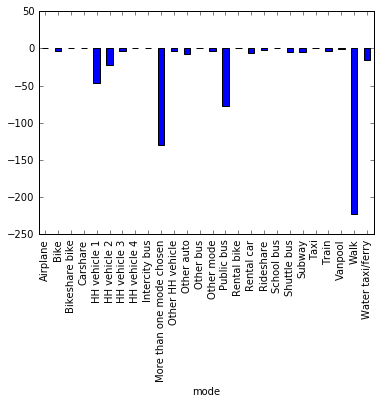

In [155]:
df = pd.DataFrame([old.groupby('mode').count()['tripid'],
                   new.groupby('mode').count()['tripid']])
df = df.T
df.columns = [old_name,new_name]
df['Difference'] = df[new_name] - df[old_name]
df['Difference'].plot(kind='bar')
print df

# Records by Purpose

                                                 Old   New  Difference
d_purpose                                                             
Change travel mode                               502    74        -428
College                                           67    62          -5
Daycare                                           89    87          -2
Drop off/Pick up                                 708   708           0
Entertainment                                    182   172         -10
Errands                                          228   225          -3
Exercise                                         432   412         -20
Gas                                              104   104           0
Grocery                                          516   511          -5
Home                                            2624  2599         -25
K12                                              239   234          -5
Medical                                          105   105           0
Other 

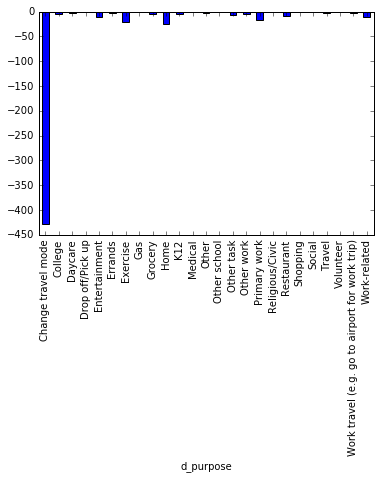

In [154]:
df = pd.DataFrame([old.groupby('d_purpose').count()['tripid'],
                   new.groupby('d_purpose').count()['tripid']])
df = df.T
df.columns = [old_name,new_name]
df['Difference'] = df[new_name] - df[old_name]
df['Difference'].plot(kind='bar')
print df

In [99]:
# Distribution of modes joined
bad_trips.groupby('mode').count()['tripid']

mode
1.0     252
2.0      18
4.0       2
5.0       8
6.0     135
7.0      47
8.0       4
16.0     14
17.0     17
18.0      3
20.0      9
21.0      7
22.0     51
23.0    294
25.0      1
26.0     10
28.0      6
29.0     56
30.0      7
31.0     13
32.0     55
Name: tripid, dtype: int64

In [103]:
# Distribution of primary modes chosen
linked_trips.groupby('mode').count()['tripid']

mode
0      13
1      25
2       4
4       2
5       1
6      95
7      26
16      4
17     11
18      2
20      4
21      5
22     26
23    221
25      1
26      6
28      4
29     34
30      2
31      6
32     13
Name: tripid, dtype: int64

# Average Travel Distance by Mode

                                 Old        New  Old (n)  New (n)
mode                                                             
Bike                        4.573817   4.751813    186.0    182.0
Bikeshare bike              0.440000   1.485000      1.0      2.0
Carshare                    4.945385   5.122308     13.0     13.0
HH vehicle 1                5.677809   5.722022   4235.0   4188.0
HH vehicle 2                6.283140   6.351718   1640.0   1618.0
HH vehicle 3                6.269588   6.421489     97.0     94.0
HH vehicle 4                7.886111   7.886111     36.0     36.0
More than one mode chosen   7.168990   8.379412    198.0     68.0
Other HH vehicle            5.768444   6.302558     90.0     86.0
Other auto                  8.047690   8.365725    277.0    269.0
Other bus                   8.112500   9.761111      8.0      9.0
Other mode                  5.388667   5.450370     30.0     27.0
Public bus                  6.222960   8.543750    446.0    368.0
Rental bik

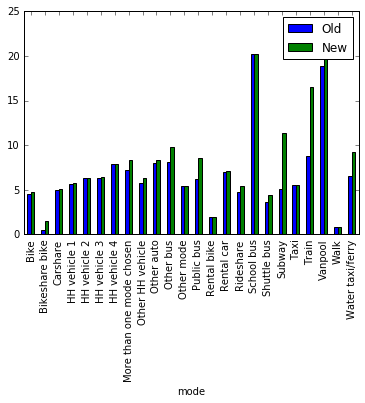

In [117]:
# Average trip length by mode
df = pd.DataFrame([old.groupby('mode').mean()['distance'],
                   new.groupby('mode').mean()['distance'],
                  old.groupby('mode').count()['distance'],
                  new.groupby('mode').count()['distance']])
df = df.T
df.columns = [old_name,new_name,old_name+' (n)',new_name + ' (n)']
df.drop(labels=['Airplane', 'Intercity bus'],axis=0,inplace=True) # drop airplane and intercity bus trips
df[[old_name,new_name]].plot(kind='bar')
print df

# Max Travel Distance by Mode

                                 Old        New
mode                                           
Bike                        4.573817   4.751813
Bikeshare bike              0.440000   1.485000
Carshare                    4.945385   5.122308
HH vehicle 1                5.677809   5.722022
HH vehicle 2                6.283140   6.351718
HH vehicle 3                6.269588   6.421489
HH vehicle 4                7.886111   7.886111
More than one mode chosen   7.168990   8.379412
Other HH vehicle            5.768444   6.302558
Other auto                  8.047690   8.365725
Other bus                   8.112500   9.761111
Other mode                  5.388667   5.450370
Public bus                  6.222960   8.543750
Rental bike                 1.980000   1.980000
Rental car                  6.940097   7.086766
Rideshare                   4.766400   5.473043
School bus                 20.250000  20.250000
Shuttle bus                 3.631364   4.440588
Subway                      5.051250  11

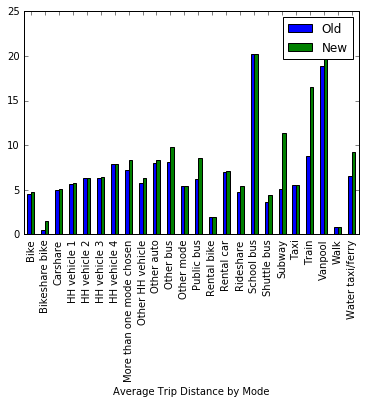

In [118]:
# Max trip length by mode
df = pd.DataFrame([old.groupby('mode').mean()['distance'],
                   new.groupby('mode').mean()['distance']])
df = df.T
df.columns = [old_name,new_name]
df.drop(labels=['Airplane', 'Intercity bus'],axis=0,inplace=True) # drop airplane and intercity bus trips
ax = df.plot(kind='bar')
ax.set_xlabel('Average Trip Distance by Mode')
print df

# Average Travel Time by Mode

                                 Old        New  Old (n)  New (n)
mode                                                             
Bike                       25.172043  25.868132    186.0    182.0
Bikeshare bike             16.000000  21.000000      1.0      2.0
Carshare                   17.538462  19.000000     13.0     13.0
HH vehicle 1               16.646989  16.873448   4235.0   4188.0
HH vehicle 2               17.621341  17.938195   1640.0   1618.0
HH vehicle 3               18.865979  19.319149     97.0     94.0
HH vehicle 4               20.333333  20.333333     36.0     36.0
More than one mode chosen  26.944444  33.147059    198.0     68.0
Other HH vehicle           18.611111  20.918605     90.0     86.0
Other auto                 19.606498  21.078067    277.0    269.0
Other bus                  25.625000  43.222222      8.0      9.0
Other mode                 12.300000  13.518519     30.0     27.0
Public bus                 25.643498  36.619565    446.0    368.0
Rental bik

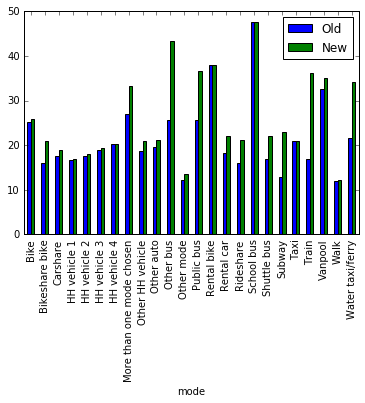

In [119]:
# Average trip length by mode
df = pd.DataFrame([old.groupby('mode').mean()['duration'],
                   new.groupby('mode').mean()['duration'],
                  old.groupby('mode').count()['duration'],
                  new.groupby('mode').count()['duration']])
df = df.T
df.columns = [old_name,new_name,old_name+' (n)',new_name + ' (n)']
df.drop(labels=['Airplane', 'Intercity bus'],axis=0,inplace=True) # drop airplane and intercity bus trips
df[[old_name,new_name]].plot(kind='bar')
print df

# Average Travel Distance by Purpose

                                                       Old         New  \
d_purpose                                                                
Change travel mode                               14.782072   43.757973   
College                                           4.236866    4.813387   
Daycare                                           2.467528    2.636667   
Drop off/Pick up                                  4.722669    4.735155   
Entertainment                                     3.759615    4.224709   
Errands                                           3.390746    3.490533   
Exercise                                          2.517477    2.661117   
Gas                                               9.560865    9.560865   
Grocery                                           3.901415    4.183542   
Home                                              6.754097    7.962974   
K12                                               2.736318    2.794786   
Medical                               

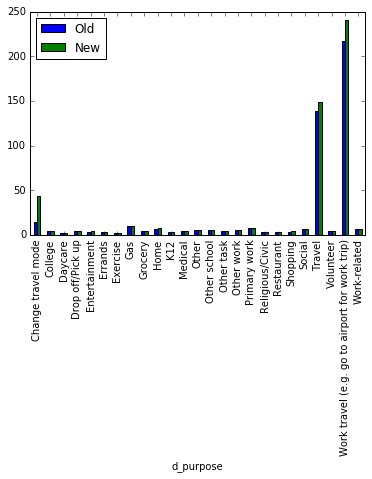

In [148]:
# Average trip length by mode
df = pd.DataFrame([old.groupby('d_purpose').mean()['distance'],
                   new.groupby('d_purpose').mean()['distance'],
                  old.groupby('d_purpose').count()['distance'],
                  new.groupby('d_purpose').count()['distance']])
df = df.T
df.columns = [old_name,new_name,old_name+' (n)',new_name + ' (n)']
# df.drop(labels=['Airplane', 'Intercity bus'],axis=0,inplace=True) # drop airplane and intercity bus trips
print df[[old_name,new_name]].plot(kind='bar')
print df

# Linked Trip Mode Pairs
Total number of records linked by mode type

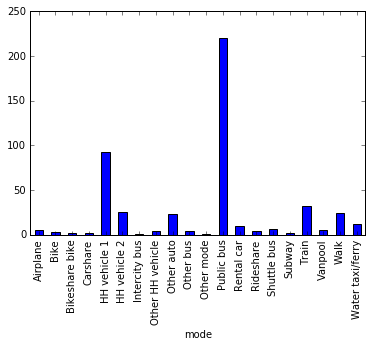

In [142]:
df = pd.pivot_table(linked_trips, index='linked_flag',columns='mode', aggfunc='count', values='tripid').fillna(0).sum()
df.plot(kind='bar')

# Total number of records linked by purpose

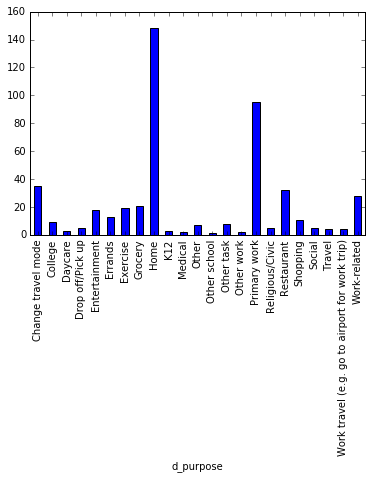

In [143]:
df = pd.pivot_table(linked_trips, index='linked_flag',columns='d_purpose', aggfunc='count', values='tripid').fillna(0).sum()
df.plot(kind='bar')